# SETUP

In [8]:
#IMPORTS
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from xgboost import XGBClassifier
from xgboost import plot_importance
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier
from sklearn.neighbors import LocalOutlierFactor

In [9]:
df = pd.read_csv("C:/Users/kmccr/OneDrive/Projects/CS Club Datathon 2023-2024/CleanedData.csv")

In [10]:
df

,V1,V2,V3,V4,V5,V7,V8,V9,V10,V11,V12,V13,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,...,V498,V500,V501,V511,V512,V521,V523,V524,V525,V526,V527,V528,V540,V541,V542,V543,V544,V545,V546,V559,V560,V561,V562,V571,V572,V573,V574,V575,V576,V577,V578,V583,V584,V585,V586,V587,V588,V589,V590,LABEL
0,1.104661,-0.381931,1.012257,0.152332,-0.059757,0.197266,0.321214,0.456562,0.022560,-1.606706,-0.132732,0.181192,0.411010,0.095735,-0.269442,-0.111414,0.445821,-0.092831,-1.347573,0.282207,-0.321925,0.222836,-0.462210,0.526211,0.400133,0.603876,-0.311261,-0.243452,0.790467,-0.478384,-0.213303,0.624358,0.065077,-0.106025,-0.065085,-4.280825,1.538925,-0.310285,0.429918,-0.245746,...,2.385861,-0.810404,-0.746064,2.272991,-0.837152,-0.187080,1.642373,-0.093210,0.046445,-0.619686,-0.584559,1.292575,-0.992275,1.416904,-0.011058,-0.587715,-0.437459,0.307251,-0.376577,-0.376927,-0.750816,-0.677489,-0.745096,0.256734,1.205559,-0.261054,-0.323314,-0.265645,-0.406088,-0.263409,-0.459907,0.529865,0.406419,0.444422,0.384813,-0.959561,0.411590,0.249965,1.155951,-1
1,-1.111667,0.797060,-0.478980,0.682921,-0.047676,-0.901862,0.254259,-0.260657,0.326870,0.124085,-0.229101,0.632765,0.182482,0.210292,-0.246770,-0.335250,0.955091,0.272365,0.432920,0.272236,0.008026,-0.174400,-0.557380,0.610107,0.480346,0.755614,-0.683649,-0.080494,-0.326582,-0.139336,-0.286481,-0.224089,-0.363294,-0.172594,0.363287,-1.257225,-4.709234,-0.036938,-2.224786,0.881593,...,-0.566861,-0.810404,-0.746064,4.908588,-0.096172,0.046753,-0.028090,-0.091329,0.067715,1.689306,-0.832987,0.032341,-0.702710,1.398869,-0.106004,-0.587715,-0.437459,0.307251,-0.376577,6.046910,0.228866,0.986016,-0.395907,0.257197,-0.263661,-0.199759,-0.633603,-0.188335,-0.600804,-0.204980,-0.590317,-1.261974,0.022250,0.014366,0.029813,2.989241,3.624748,3.319299,-0.179034,1
2,-0.349528,-0.198367,-0.051300,-1.101637,-0.051044,0.500831,-0.013558,0.342889,-0.764675,-0.370427,-0.116670,0.580666,0.214486,0.534424,-0.089524,-0.227477,0.758114,-0.013002,-0.236259,0.239531,-0.173024,-0.513491,-0.468066,0.618553,0.344722,0.543197,-1.897108,0.680711,0.696367,-0.545260,-0.210688,-0.209288,-0.061422,-0.172167,0.061414,-3.374008,-0.335478,-0.904900,0.373815,-0.878683,...,-0.367815,-0.810404,1.457138,1.533381,-0.837152,-0.044613,-0.205360,-0.085881,-0.010293,0.304793,-0.733553,0.048066,-0.700555,1.781147,-0.633974,-0.587715,-0.437459,0.307251,-0.376577,1.982971,2.001530,3.849650,1.601604,0.002547,-0.278201,-0.221543,-0.691556,-0.232733,-0.770443,-0.224878,-0.645502,-0.321993,-0.292071,-0.361933,-0.283236,-0.101830,-0.178813,-0.308096,-0.275070,-1
3,0.241601,0.087302,1.112026,-0.158157,-0.047264,-0.114828,0.187305,0.544522,-0.149441,-0.789687,-0.598518,0.609586,0.558082,0.435888,0.179335,0.170453,0.559627,-0.034565,-0.971160,0.226769,-0.217018,-0.131289,0.143177,0.477787,0.278230,0.511290,-1.925999,1.931524,2.593529,-0.747941,0.488235,-0.143239,-0.282964,-0.157175,0.282956,-0.220535,-1.543969,1.525461,0.352621,-0.484687,...,0.762727,0.092199,-0.746064,2.448887,-0.837152,-0.025393,0.563456,-0.094584,-0.061615,-0.654274,0.808243,-0.011234,-0.779252,0.077975,-0.045273,-0.587715,-0.437459,0.307251,-0.376577,-0.205211,-0.546736,-0.510751,-0.537943,0.085251,-0.270204,-0.227336,-0.495965,-0.222314,-0.503446,-0.230717,-0.454341,-5.903129,26.850080,27.054143,26.896166,-0.101830,-0.178813,-0.308096,-0.275070,-1
4,-0.926396,-0.783634,1.112026,-0.158157,-0.047264,-0.114828,0.187305,0.890953,1.160413,0.575595,0.445486,0.158166,-0.122889,0.067160,-0.276015,0.269936,0.424534,0.057193,-1.281850,-0.701326,0.860822,-0.072600,0.169618,-1.750247,-0.849504,-2.883769,-2.057602,-1.793266,-1.358639,-0.286163,0.042353,0.511821,-0.002654,-0.187897,0.002646,0.242080,0.426908,-0.656674,-0.331003,-0.139410,...,0.517905,-0.810404,-0.746064,0.344149,1.050288,-0.104044,0.904806,-0.092414,-0.055227,-0.294461,1.527755,0.371305,-0.992275,1.416904,-0.011058,-0.587715,-0.437459,0.307251,-0.376577,-0.5

In [11]:
X = df.iloc[:, 0:412]
y = df.iloc[:, 412]

In [12]:
X

,V1,V2,V3,V4,V5,V7,V8,V9,V10,V11,V12,V13,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,...,V497,V498,V500,V501,V511,V512,V521,V523,V524,V525,V526,V527,V528,V540,V541,V542,V543,V544,V545,V546,V559,V560,V561,V562,V571,V572,V573,V574,V575,V576,V577,V578,V583,V584,V585,V586,V587,V588,V589,V590
0,1.104661,-0.381931,1.012257,0.152332,-0.059757,0.197266,0.321214,0.456562,0.022560,-1.606706,-0.132732,0.181192,0.411010,0.095735,-0.269442,-0.111414,0.445821,-0.092831,-1.347573,0.282207,-0.321925,0.222836,-0.462210,0.526211,0.400133,0.603876,-0.311261,-0.243452,0.790467,-0.478384,-0.213303,0.624358,0.065077,-0.106025,-0.065085,-4.280825,1.538925,-0.310285,0.429918,-0.245746,...,-0.698050,2.385861,-0.810404,-0.746064,2.272991,-0.837152,-0.187080,1.642373,-0.093210,0.046445,-0.619686,-0.584559,1.292575,-0.992275,1.416904,-0.011058,-0.587715,-0.437459,0.307251,-0.376577,-0.376927,-0.750816,-0.677489,-0.745096,0.256734,1.205559,-0.261054,-0.323314,-0.265645,-0.406088,-0.263409,-0.459907,0.529865,0.406419,0.444422,0.384813,-0.959561,0.411590,0.249965,1.155951
1,-1.111667,0.797060,-0.478980,0.682921,-0.047676,-0.901862,0.254259,-0.260657,0.326870,0.124085,-0.229101,0.632765,0.182482,0.210292,-0.246770,-0.335250,0.955091,0.272365,0.432920,0.272236,0.008026,-0.174400,-0.557380,0.610107,0.480346,0.755614,-0.683649,-0.080494,-0.326582,-0.139336,-0.286481,-0.224089,-0.363294,-0.172594,0.363287,-1.257225,-4.709234,-0.036938,-2.224786,0.881593,...,-0.441929,-0.566861,-0.810404,-0.746064,4.908588,-0.096172,0.046753,-0.028090,-0.091329,0.067715,1.689306,-0.832987,0.032341,-0.702710,1.398869,-0.106004,-0.587715,-0.437459,0.307251,-0.376577,6.046910,0.228866,0.986016,-0.395907,0.257197,-0.263661,-0.199759,-0.633603,-0.188335,-0.600804,-0.204980,-0.590317,-1.261974,0.022250,0.014366,0.029813,2.989241,3.624748,3.319299,-0.179034
2,-0.349528,-0.198367,-0.051300,-1.101637,-0.051044,0.500831,-0.013558,0.342889,-0.764675,-0.370427,-0.116670,0.580666,0.214486,0.534424,-0.089524,-0.227477,0.758114,-0.013002,-0.236259,0.239531,-0.173024,-0.513491,-0.468066,0.618553,0.344722,0.543197,-1.897108,0.680711,0.696367,-0.545260,-0.210688,-0.209288,-0.061422,-0.172167,0.061414,-3.374008,-0.335478,-0.904900,0.373815,-0.878683,...,-0.024844,-0.367815,-0.810404,1.457138,1.533381,-0.837152,-0.044613,-0.205360,-0.085881,-0.010293,0.304793,-0.733553,0.048066,-0.700555,1.781147,-0.633974,-0.587715,-0.437459,0.307251,-0.376577,1.982971,2.001530,3.849650,1.601604,0.002547,-0.278201,-0.221543,-0.691556,-0.232733,-0.770443,-0.224878,-0.645502,-0.321993,-0.292071,-0.361933,-0.283236,-0.101830,-0.178813,-0.308096,-0.275070
3,0.241601,0.087302,1.112026,-0.158157,-0.047264,-0.114828,0.187305,0.544522,-0.149441,-0.789687,-0.598518,0.609586,0.558082,0.435888,0.179335,0.170453,0.559627,-0.034565,-0.971160,0.226769,-0.217018,-0.131289,0.143177,0.477787,0.278230,0.511290,-1.925999,1.931524,2.593529,-0.747941,0.488235,-0.143239,-0.282964,-0.157175,0.282956,-0.220535,-1.543969,1.525461,0.352621,-0.484687,...,3.160828,0.762727,0.092199,-0.746064,2.448887,-0.837152,-0.025393,0.563456,-0.094584,-0.061615,-0.654274,0.808243,-0.011234,-0.779252,0.077975,-0.045273,-0.587715,-0.437459,0.307251,-0.376577,-0.205211,-0.546736,-0.510751,-0.537943,0.085251,-0.270204,-0.227336,-0.495965,-0.222314,-0.503446,-0.230717,-0.454341,-5.903129,26.850080,27.054143,26.896166,-0.101830,-0.178813,-0.308096,-0.275070
4,-0.926396,-0.783634,1.112026,-0.158157,-0.047264,-0.114828,0.187305,0.890953,1.160413,0.575595,0.445486,0.158166,-0.122889,0.067160,-0.276015,0.269936,0.424534,0.057193,-1.281850,-0.701326,0.860822,-0.072600,0.169618,-1.750247,-0.849504,-2.883769,-2.057602,-1.793266,-1.358639,-0.286163,0.042353,0.511821,-0.002654,-0.187897,0.002646,0.242080,0.426908,-0.656674,-0.331003,-0.139410,...,-0.613295,0.517905,-0.810404,-0.746064,0.344149,1.050288,-0.104044,0.904806,-0.092414,-0.055227,-0.294461,1.527755,0.371305,-0.992275,1.416904,-0.011058,-0.587

In [13]:
y = y.replace(-1, 0)
class_names = ['pass', 'fail']
y

0       0
1       1
2       0
3       0
4       0
       ..
1388    0
1389    0
1390    0
1391    0
1392    0
Name: LABEL, Length: 1393, dtype: int64

In [14]:
y.value_counts()

LABEL
0    1294
1      99
Name: count, dtype: int64

In [15]:
#SPLIT INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)
X_train

,V1,V2,V3,V4,V5,V7,V8,V9,V10,V11,V12,V13,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,...,V497,V498,V500,V501,V511,V512,V521,V523,V524,V525,V526,V527,V528,V540,V541,V542,V543,V544,V545,V546,V559,V560,V561,V562,V571,V572,V573,V574,V575,V576,V577,V578,V583,V584,V585,V586,V587,V588,V589,V590
83,-0.299543,-0.357929,-0.300904,-0.654175,-0.050467,0.370420,-0.136308,0.493099,-0.546366,0.048833,-0.759134,-0.085473,-0.494948,-1.016999,0.108283,0.046100,-0.193076,-0.069433,-0.104813,4.800634,-4.040218,1.351145,0.275812,-4.312177,-5.519811,-4.144610,-1.948448,1.034276,1.245785,-0.356775,0.131470,-0.149859,-0.341309,-0.151078,0.341301,1.556932,3.398331,-0.005065,-2.234345,0.741364,...,-0.208902,0.451065,-0.810404,-0.746064,1.647865,1.767120,-0.135715,0.564483,-0.002193,-0.102485,0.317573,1.126473,-0.184634,-0.939199,0.244931,-0.202815,-0.587715,-0.437459,0.307251,-0.376577,6.050487,0.189143,0.848360,-0.424200,0.193716,1.275349,-0.222238,0.382583,-0.216340,0.332947,-0.226196,0.106064,-0.145747,1.005956,0.713207,0.966893,-0.967653,0.218574,0.319722,0.986543
1301,2.132074,1.723464,0.557470,0.091590,-0.045011,-1.194733,-0.214422,-0.589495,0.273946,-0.628433,0.405332,0.430203,1.255287,0.072740,0.099672,0.228484,0.418385,-11.945637,-1.287825,0.625606,-0.548661,0.054559,0.199935,0.362923,0.350000,0.587239,0.366108,0.218752,-0.156597,-0.552545,-0.186015,0.084883,0.229289,-0.123580,-0.229297,0.183555,-1.963437,0.427090,0.531319,-0.442745,...,0.015365,-0.973850,-0.810404,-0.746064,-0.607765,-0.837152,-0.304295,-0.911693,0.527465,0.044577,1.346965,1.465257,0.084441,1.855249,0.589090,0.383435,-0.843492,-0.111417,-0.369522,0.003418,0.487614,-0.175817,-0.237378,-0.223875,0.044885,-0.601706,-0.203931,-0.208616,-0.206288,-0.273327,-0.208118,-0.117680,0.617988,0.604325,0.551936,0.575700,0.683076,0.581899,0.319722,-0.294456
583,-0.321819,-0.579549,-0.934520,-0.765626,-0.059510,0.578141,0.153828,-1.634199,-1.816528,0.887353,0.308963,-0.409425,0.613328,0.433240,0.114107,0.817090,-0.577501,0.123717,0.833233,-1.256108,1.393819,-0.256274,0.601200,-1.257568,-0.266375,-1.223572,-0.237414,1.224638,0.341219,1.760456,8.768961,10.560418,6.053908,3.998570,-6.053912,3.214716,0.371173,4.822236,0.415373,0.084279,...,3.367236,0.258112,-0.810404,-0.746064,4.281559,-0.837152,0.068007,-0.042771,-0.085832,-0.120744,-0.527373,0.447340,-0.241075,-1.491193,1.034626,1.577583,-0.587715,-0.437459,0.307251,-0.376577,-0.095504,0.727397,0.573048,0.817722,0.267277,-1.489708,-0.226525,0.120588,-0.226738,0.182485,-0.230528,0.445048,-2.055082,1.227145,1.465805,1.206913,0.917738,0.797623,0.528995,-0.299672
136,0.424427,-0.493488,-0.530933,-0.986045,-0.056445,0.227729,-0.047036,1.665008,-0.863907,-0.929440,0.068039,-0.552458,-1.716934,-0.068499,-0.189446,-0.990177,-0.482644,0.345312,0.976628,0.030142,-0.271164,0.590184,-0.575725,0.324635,0.283507,0.501645,0.468819,-1.004657,-1.064199,-0.464187,-0.028161,0.210733,-0.123065,-0.131386,0.123057,0.948332,0.637314,-0.180473,-0.021814,-0.039428,...,-0.031558,0.353822,-0.810404,-0.746064,1.630601,0.796209,-0.064289,0.340581,-0.099551,-0.065095,-0.130217,-1.012969,-0.112097,0.881837,-0.214950,0.632539,-0.587715,-0.437459,0.307251,-0.376577,-0.077617,1.895269,1.895322,2.064447,0.003324,0.659600,-0.195472,0.726678,-0.197719,0.676650,-0.199821,0.512831,1.881087,0.202693,0.256273,0.180539,-1.072847,0.218574,0.738268,1.320473
925,-1.317312,-0.177722,1.586387,-0.807431,-0.050352,0.520600,-0.526876,0.977560,0.313639,-0.510180,1.160228,-0.873801,-0.230770,-0.198799,-0.157414,0.659576,-0.886702,0.085179,0.050532,0.423794,-0.684025,0.381875,-0.057413,0.551548,0.297228,0.484768,-0.401144,0.436029,0.623516,-0.638101,-0.634314,-0.076000,-0.376824,0.038883,0.376816,-0.378685,0.149575,-0.434897,-2.256786,0.829060,...,-0.023418,2.580287,2.090592,-0.746064,-0.417137,-0.837152,-0.188834,-0.026275,-0.082192,0.114832,-0.572267,-0.346878,-1.767312,-0.348895,-1.110530,-1.263036,1.896975,2.496919,1.999182,

In [16]:
#HOW MANY FAILS IN TRAINING SET?
y_test.value_counts()

LABEL
0    390
1     28
Name: count, dtype: int64

# LOGISTIC REGRESSION

              precision    recall  f1-score   support

        pass       0.94      0.93      0.93       390
        fail       0.10      0.11      0.11        28

    accuracy                           0.88       418
   macro avg       0.52      0.52      0.52       418
weighted avg       0.88      0.88      0.88       418



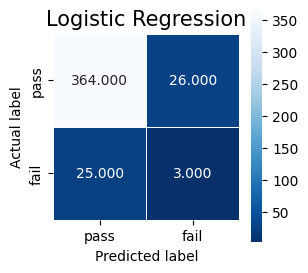

In [17]:
#FIT MODEL
model = LogisticRegression(random_state = 123, solver='lbfgs', multi_class='auto')
model.fit(X_train, y_train)

#PREDICT USING TEST DATA
y_pred = model.predict(X_test)

#STORE PROBABILITIES
probs_y = model.predict_proba(X_test)

#EVALUATE RESULTS
print(classification_report(y_test, y_pred, target_names=class_names))
score = model.score(X_test, y_test)

#CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)

#PLOT
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', xticklabels=class_names, yticklabels=class_names);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Logistic Regression'.format(score)
plt.title(all_sample_title, size = 15);

# DECISION TREE

              precision    recall  f1-score   support

        pass       0.95      0.95      0.95       390
        fail       0.25      0.25      0.25        28

    accuracy                           0.90       418
   macro avg       0.60      0.60      0.60       418
weighted avg       0.90      0.90      0.90       418



Text(0.5, 1.0, 'Decision Tree')

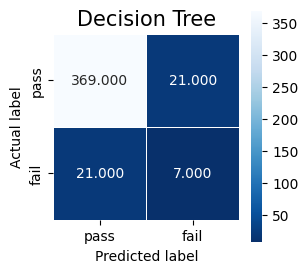

In [18]:
#FIT MODEL
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

#PREDICT USING TEST DATA
y_pred = model.predict(X_test)

#EVALUATE RESULTS
print(classification_report(y_test, y_pred, target_names=class_names))
score = model.score(X_test, y_test)

#CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)

#PLOT
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', xticklabels=class_names, yticklabels=class_names);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Decision Tree'.format(score)
plt.title(all_sample_title, size = 15)

# RANDOM FOREST

              precision    recall  f1-score   support

        pass       0.94      1.00      0.97       390
        fail       0.50      0.04      0.07        28

    accuracy                           0.93       418
   macro avg       0.72      0.52      0.52       418
weighted avg       0.91      0.93      0.91       418



Text(0.5, 1.0, 'Random Forest')

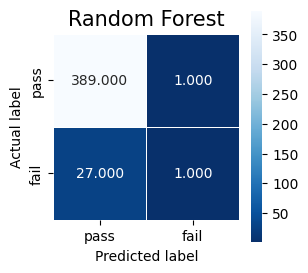

In [20]:
#TRAIN MODEL
model = RandomForestClassifier()
model.fit(X_train, y_train)

#PREDICT USING TEST DATA
y_pred = model.predict(X_test)

#EVALUATE RESULTS
print(classification_report(y_test, y_pred, target_names=class_names))
score = model.score(X_test, y_test)

#CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)

#PLOT
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', xticklabels=class_names, yticklabels=class_names);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Random Forest'.format(score)
plt.title(all_sample_title, size = 15)

# XGBOOST

              precision    recall  f1-score   support

        pass       0.93      1.00      0.97       390
        fail       0.00      0.00      0.00        28

    accuracy                           0.93       418
   macro avg       0.47      0.50      0.48       418
weighted avg       0.87      0.93      0.90       418



C:\Users\kmccr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kmccr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kmccr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

Text(0.5, 1.0, 'XGBoost')

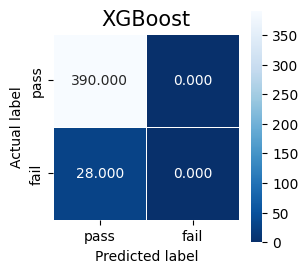

In [21]:
#TRAIN MODEL
model = XGBClassifier(random_state=123)
model.fit(X_train, y_train)

#PREDICT USING TEST DATA
y_pred = model.predict(X_test)

#EVALUATE RESULTS
print(classification_report(y_test, y_pred, target_names=class_names))
score = model.score(X_test, y_test)

#CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)

#PLOT
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', xticklabels=class_names, yticklabels=class_names);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'XGBoost'.format(score)
plt.title(all_sample_title, size = 15)

# UNDERSAMPLE

In [22]:
pass_indices = np.array(y.loc[y == 0].index)
len(pass_indices)

1294

In [23]:
fail_indices = np.array(y.loc[y == 1].index)
len(fail_indices)

99

In [24]:
np.random.seed(1234)
random_pass_indices = np.random.choice(pass_indices, size = len(fail_indices), replace = False)
len(random_pass_indices)

99

In [25]:
US_indices = np.concatenate([fail_indices, random_pass_indices])
US_indices

array([   1,    9,   10,   13,   20,   33,   35,   40,   43,   44,   45,
         51,   52,   56,   73,   83,   97,  110,  131,  134,  135,  144,
        146,  157,  159,  162,  164,  165,  190,  194,  206,  207,  209,
        211,  212,  214,  215,  243,  247,  252,  261,  264,  288,  290,
        293,  294,  310,  317,  333,  338,  356,  370,  388,  403,  410,
        453,  466,  474,  529,  536,  553,  557,  583,  649,  732,  734,
        760,  803,  843,  851,  853,  855,  950,  980, 1058, 1065, 1097,
       1101, 1119, 1133, 1142, 1145, 1146, 1158, 1206, 1207, 1226, 1227,
       1229, 1230, 1231, 1244, 1245, 1263, 1264, 1265, 1294, 1328, 1375,
         46, 1188,  555,  404, 1388,  978,  610,  840,  132,  107,  941,
        854,  719, 1156,   88,  381,  925, 1004, 1088,  652,  238,  143,
       1073,  301,  712,  270,  756, 1271,  414, 1306, 1371, 1300,  246,
        452,  656, 1313, 1286,  323,  472,  747,   75,  440, 1029,  639,
       1060,  889,  695,  808,  276,   41,  489,  1

In [26]:
X_under = X.iloc[US_indices, :]
X_under

,V1,V2,V3,V4,V5,V7,V8,V9,V10,V11,V12,V13,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,...,V497,V498,V500,V501,V511,V512,V521,V523,V524,V525,V526,V527,V528,V540,V541,V542,V543,V544,V545,V546,V559,V560,V561,V562,V571,V572,V573,V574,V575,V576,V577,V578,V583,V584,V585,V586,V587,V588,V589,V590
1,-1.111667,0.797060,-0.478980,0.682921,-0.047676,-0.901862,0.254259,-0.260657,0.326870,0.124085,-0.229101,0.632765,0.182482,0.210292,-0.246770,-0.335250,0.955091,0.272365,0.432920,0.272236,0.008026,-0.174400,-0.557380,0.610107,0.480346,0.755614,-0.683649,-0.080494,-0.326582,-0.139336,-0.286481,-0.224089,-0.363294,-0.172594,0.363287,-1.257225,-4.709234,-0.036938,-2.224786,0.881593,...,-0.441929,-0.566861,-0.810404,-0.746064,4.908588,-0.096172,0.046753,-0.028090,-0.091329,0.067715,1.689306,-0.832987,0.032341,-0.702710,1.398869,-0.106004,-0.587715,-0.437459,0.307251,-0.376577,6.046910,0.228866,0.986016,-0.395907,0.257197,-0.263661,-0.199759,-0.633603,-0.188335,-0.600804,-0.204980,-0.590317,-1.261974,0.022250,0.014366,0.029813,2.989241,3.624748,3.319299,-0.179034
9,-0.277131,0.651179,-0.183820,-0.792928,-0.051044,0.357065,0.053396,0.697439,-1.201293,0.124085,-1.690708,0.539006,1.019536,-0.065550,0.159825,-0.418152,0.493825,-0.067598,0.863107,4.611984,-4.397242,1.326148,0.227065,-4.216457,-5.560973,-4.104184,-0.227793,-1.032061,-0.563348,-0.318107,-0.286481,-0.224089,-0.363294,-0.172594,0.363287,-1.257225,-4.709234,-0.036938,-2.224786,0.881593,...,0.522696,0.244030,0.650120,1.157987,0.831683,-0.837152,0.365655,0.976465,-0.081951,-0.056413,-0.175238,-1.111359,-0.127451,-0.779252,0.077975,-0.045273,-0.587715,-0.437459,0.307251,-0.376577,4.315443,1.964289,3.872916,1.097023,0.094446,-0.837246,-0.218763,-0.295142,-0.215471,-0.273327,-0.222526,-0.167530,-2.231329,0.028070,0.068123,0.040154,1.136217,0.457006,0.633631,-0.445809
10,-1.162874,-0.204585,-0.146925,0.474044,-0.056802,-0.512618,0.432804,0.083067,1.180259,-1.671208,-1.594338,0.666075,0.036841,0.395780,0.085445,-0.343540,0.706946,0.207675,0.952729,-0.764741,0.367587,-0.045973,0.362112,-1.696756,-0.891721,-2.896629,-1.367404,-0.732815,-0.724228,-0.282988,0.044377,0.493226,-0.078925,-0.242465,0.078918,0.364721,0.248510,-0.697510,-0.282796,-0.057645,...,-0.124452,-0.684945,2.070899,-0.746064,0.323071,-0.837152,0.342875,-1.033575,-0.094367,-0.026374,-0.069330,0.414473,0.457926,-1.194923,1.117557,-0.158967,-0.587715,-0.437459,0.307251,-0.376577,0.469727,0.560061,0.609886,0.530994,0.184161,0.307743,-0.239966,-0.264154,-0.233892,-0.304305,-0.243104,-0.307287,-0.410116,1.593852,1.438927,1.536256,1.257594,1.297196,0.982419,-0.257342
13,-0.685706,1.661903,0.815734,-1.015647,-0.051541,0.598984,-0.236740,-0.209234,1.008258,-1.294949,-0.494118,-1.405503,0.268444,0.538959,-0.052042,-0.186026,-1.600499,-0.104760,-0.128712,6.679556,-7.038541,2.015017,0.148258,-5.467580,-7.913013,-4.718852,-2.022296,0.137028,0.456566,-0.397685,-0.121028,0.178824,-0.332092,-0.130454,0.332085,0.932879,3.345506,-0.234036,0.276986,-0.596107,...,1.673479,-0.146617,0.250335,1.414508,1.851201,1.373849,1.676497,0.762233,0.394038,0.054290,-0.115754,0.451722,-0.792566,-1.519926,2.589286,0.462534,-0.587715,-0.437459,0.307251,-0.376577,-0.967200,-1.005046,-0.886882,-0.987805,0.121200,0.650512,-0.197326,0.094832,-0.200219,0.170684,-0.202096,-0.036432,2.233580,-0.344457,-0.335054,-0.340837,-0.101830,1.410735,1.087056,0.460508
20,-1.761882,0.232438,-1.361448,-1.123924,-0.049593,0.703021,0.243100,1.294219,-2.041452,-1.499204,-0.044393,-1.158210,0.935970,1.260557,-0.443828,-0.152865,-0.972245,-0.022637,1.430714,4.712889,-3.916698,1.258765,0.064198,-4.286839,-5.525088,-4.142922,-2.022296,-0.732815,0.098382,-0.371346,-0.121028,0.178824,-0.332092,-0.130454,0.332085,0.932879,3.345506,-0.234036,0.276986,-0.596107,...,-0.328070,-0.384359,-0.810404,2.020180,0.115465,-0.837152,-0.192920,-0.184021,0.404381,0.054721,0.455697,0.590804,-1.066141,-1.045910,1.491091,-0.134833,-0.587715,-0.4374

In [27]:
y_under = y.iloc[US_indices]
y_under

1       1
9       1
10      1
13      1
20      1
       ..
1147    0
1038    0
707     0
1320    0
832     0
Name: LABEL, Length: 198, dtype: int64

In [29]:
#SPLIT INTO TRAIN AND TEST
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size = 0.3, random_state = 1)

y_train_under.value_counts()

LABEL
0    70
1    68
Name: count, dtype: int64

# UNDERSAMPLED LOGISTIC REGRESSION

              precision    recall  f1-score   support

        pass       0.47      0.48      0.47        29
        fail       0.50      0.48      0.49        31

    accuracy                           0.48        60
   macro avg       0.48      0.48      0.48        60
weighted avg       0.48      0.48      0.48        60



Text(0.5, 1.0, 'Logistic Regression')

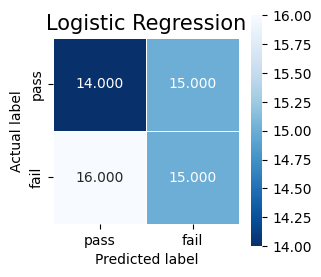

In [30]:
#FIT MODEL
model = LogisticRegression(random_state = 123, solver='lbfgs', multi_class='auto')
model.fit(X_train_under, y_train_under)

#PREDICT USING TEST DATA
y_pred = model.predict(X_test_under)

#EVALUATE RESULTS
print(classification_report(y_test_under, y_pred, target_names=class_names))
score = model.score(X_test_under, y_test_under)

#CONFUSION MATRIX
cm = confusion_matrix(y_test_under, y_pred)

#PLOT
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', xticklabels=class_names, yticklabels=class_names);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Logistic Regression'.format(score)
plt.title(all_sample_title, size = 15)

# UNDERSAMPLED DECISION TREE

              precision    recall  f1-score   support

        pass       0.53      0.66      0.58        29
        fail       0.58      0.45      0.51        31

    accuracy                           0.55        60
   macro avg       0.56      0.55      0.55        60
weighted avg       0.56      0.55      0.55        60



Text(0.5, 1.0, 'Decision Tree')

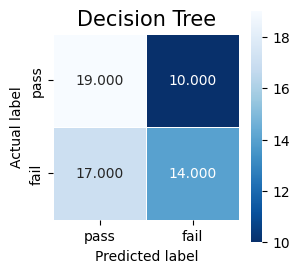

In [31]:
#FIT MODEL
model = tree.DecisionTreeClassifier()
model.fit(X_train_under, y_train_under)

#PREDICT USING TEST DATA
y_pred = model.predict(X_test_under)

#EVALUATE RESULTS
print(classification_report(y_test_under, y_pred, target_names=class_names))
score = model.score(X_test_under, y_test_under)

#CONFUSION MATRIX
cm = confusion_matrix(y_test_under, y_pred)

#PLOT
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', xticklabels=class_names, yticklabels=class_names);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Decision Tree'.format(score)
plt.title(all_sample_title, size = 15)

# UNDERSAMPLED XGBOOST

              precision    recall  f1-score   support

        pass       0.58      0.62      0.60        29
        fail       0.62      0.58      0.60        31

    accuracy                           0.60        60
   macro avg       0.60      0.60      0.60        60
weighted avg       0.60      0.60      0.60        60



Text(0.5, 1.0, 'XGBoost')

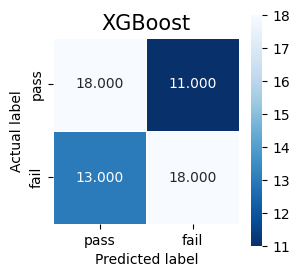

In [32]:
model = XGBClassifier(random_state=123)
model.fit(X_train_under, y_train_under)

#PREDICT USING TEST DATA
y_pred = model.predict(X_test_under)

#EVALUATE RESULTS
print(classification_report(y_test_under, y_pred, target_names=class_names))
score = model.score(X_test_under, y_test_under)

#CONFUSION MATRIX
cm = confusion_matrix(y_test_under, y_pred)

#PLOT
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', xticklabels=class_names, yticklabels=class_names);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'XGBoost'.format(score)
plt.title(all_sample_title, size = 15)

# WEIGHTED XGBOOST

12.732394366197184
              precision    recall  f1-score   support

        pass       0.93      0.99      0.96       390
        fail       0.00      0.00      0.00        28

    accuracy                           0.93       418
   macro avg       0.47      0.50      0.48       418
weighted avg       0.87      0.93      0.90       418



Text(0.5, 1.0, 'Weighted XGBoost')

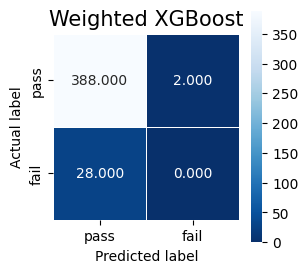

In [33]:
ratio = float(y_train.value_counts()[0]) / y_train.value_counts()[1]
print(ratio)

#TRAIN MODEL
model = XGBClassifier(scale_pos_weight=ratio)
model.fit(X_train, y_train)

#PREDICT USING TEST DATA
y_pred = model.predict(X_test)

#EVALUATE RESULTS
print(classification_report(y_test, y_pred, target_names=class_names))
score = model.score(X_test, y_test)

#CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)

#PLOT
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', xticklabels=class_names, yticklabels=class_names);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Weighted XGBoost'.format(score)
plt.title(all_sample_title, size = 15)

# BALANCED RANDOM FOREST

              precision    recall  f1-score   support

        pass       0.95      0.92      0.93       390
        fail       0.24      0.36      0.29        28

    accuracy                           0.88       418
   macro avg       0.60      0.64      0.61       418
weighted avg       0.90      0.88      0.89       418



Text(0.5, 1.0, 'Balanced Random Forest')

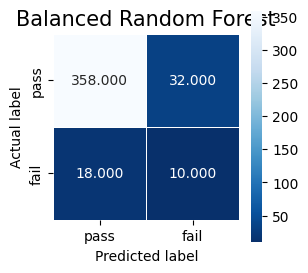

In [34]:
#TRAIN MODEL
model = BalancedRandomForestClassifier(sampling_strategy="all", replacement=True, random_state=0, bootstrap=False)
model.fit(X_train, y_train)

#PREDICT USING TEST DATA
y_pred = model.predict(X_test)

#EVALUATE RESULTS
print(classification_report(y_test, y_pred, target_names=class_names))
score = model.score(X_test, y_test)

#CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)

#PLOT
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', xticklabels=class_names, yticklabels=class_names);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Balanced Random Forest'.format(score)
plt.title(all_sample_title, size = 15)

# RUSBoost

              precision    recall  f1-score   support

        pass       0.96      0.81      0.88       390
        fail       0.18      0.57      0.27        28

    accuracy                           0.79       418
   macro avg       0.57      0.69      0.57       418
weighted avg       0.91      0.79      0.84       418



Text(0.5, 1.0, 'RUSBoost')

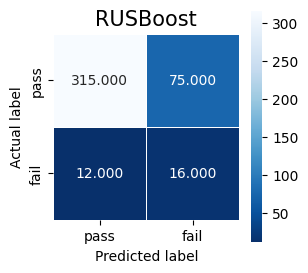

In [35]:
#TRAIN MODEL
model = RUSBoostClassifier(random_state=0)
model.fit(X_train, y_train)

#PREDICT USING TEST DATA
y_pred = model.predict(X_test)

#EVALUATE RESULTS
print(classification_report(y_test, y_pred, target_names=class_names))
score = model.score(X_test, y_test)

#CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)

#PLOT
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', xticklabels=class_names, yticklabels=class_names);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'RUSBoost'.format(score)
plt.title(all_sample_title, size = 15)

# LOCAL OUTLIER FACTOR

              precision    recall  f1-score   support

        pass       0.91      0.08      0.14       390
        fail       0.06      0.89      0.12        28

    accuracy                           0.13       418
   macro avg       0.49      0.48      0.13       418
weighted avg       0.85      0.13      0.14       418



Text(0.5, 1.0, 'Local Factor Outlier')

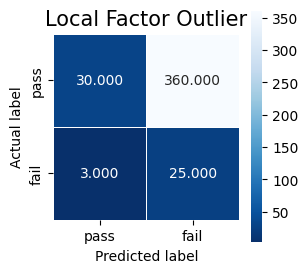

In [39]:
y_train = y_train.replace(0, -1)
y_test = y_test.replace(0, -1)

#TRAIN MODEL
model = LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, metric='minkowski', p=2, 
                           metric_params=None, contamination=1/ratio)
model.fit(X_train, y_train)

#PREDICT
y_pred = model.fit_predict(X_test)

#EVALUATE RESULTS
print(classification_report(y_test, y_pred, target_names=class_names))

#CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)

#PLOT
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', xticklabels=class_names, yticklabels=class_names);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Local Factor Outlier'.format(score)
plt.title(all_sample_title, size = 15)